# Demonstration of the Reimannian Manifold Hamiltonian Monte Carlo package (RMHMC)
This package use `jax` from google. You need to install it first to be able to run this notebook. Follow the instruction [Here](https://github.com/google/jax)

This Jupyter notebook demonstrate how to use the Rmhmc package.

First we import several packages.

In [1]:
import Rmhmc
import jax.numpy as np
import numpy as onp
import jax
import importlib
import matplotlib.pyplot as plt
import scipy.fftpack as FFT
import seaborn as sns
sns.set_style()

We need to add this if the Rmhmc.py is modified

In [7]:
importlib.reload(Rmhmc)

<module 'Rmhmc' from '/home/muhammad/GitHub/Reimmanian-Manifold-HMC/Rmhmc.py'>

Now the first thing is to define a target density, and choose among many choice of the metric. Here we will use the softabs metric of Betancourt. Then we specify the $\epsilon$ and $l$ constant for the Leapfrog integrator. After that we can create directly the RMHMC object by creating the instance from RMHMC class, with the initial position $x_{0}$ and momentum $p_{0}$.
We can change some of the parameter, like the number of samples later on. To run the simulation just invoke
```python
hmc.run()
```

In [18]:
target = Rmhmc.Target(Rmhmc.funnel_neglog,2,metric_fun=Rmhmc.softabs)
x_init = np.array([0.,0.])
p_init = np.array([0.,0.])
hmc = Rmhmc.RMHMC(1000,target,x_init,p_init,seed=onp.random.randint(1,1000))
hmc.track=True
target.softabs_const = 1e0
hmc.epsilon *= 1
hmc.l *=1
hmc.run()
print('is there any nan here? {}'.format(onp.any(onp.isnan(hmc.samples))))


 67%|██████▋   | 673/999 [00:11<00:03, 84.91it/s]There is nan in the result! revert back to the original position

100%|██████████| 999/999 [00:15<00:00, 65.63it/s]is there any nan here? False



Then we can plot the samples it collects.

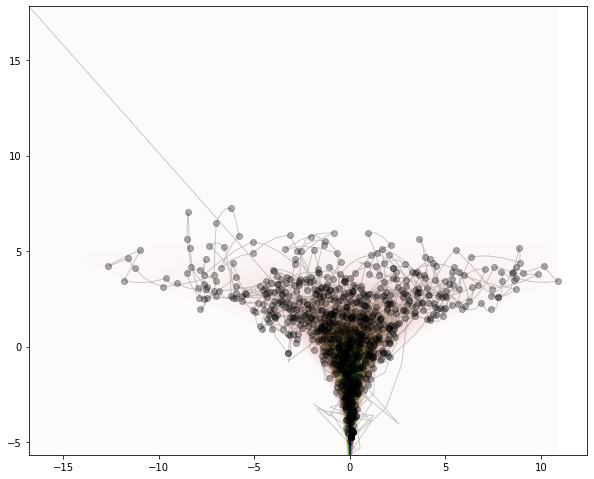

In [19]:
plt.figure(figsize=(10,10))
x = np.linspace(np.nanmin(hmc.path[:,0]),np.nanmax(hmc.path[:,0]),501)  
y = np.linspace(np.nanmin(hmc.path[:,1]),np.nanmax(hmc.path[:,1]),501)
X,Y = np.meshgrid(x,y)
Z = np.exp(-target.neglog((X,Y)))
plt.imshow(Z, vmin=Z.min(), vmax=Z.max(), origin='lower',
        extent=[x.min(), x.max(), y.min(), y.max()],cmap=plt.cm.gist_earth_r)
plt.plot(hmc.path[:,0],hmc.path[:,1],alpha=0.2,linewidth=1,color='black')
plt.scatter(hmc.samples[:,0],hmc.samples[:,1],alpha=0.3,color='black')
plt.show()

We could also plot the Autocorrelation function as below

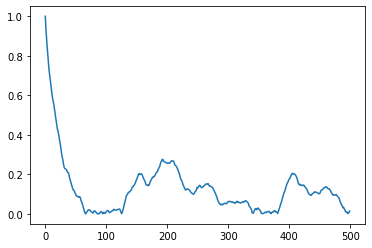

In [20]:
xp = hmc.samples[:,0] - onp.mean(hmc.samples[:,0])
n = xp.shape[0]
xp = onp.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
f = FFT.fft(xp)
p = onp.absolute(f)**2
pi = FFT.ifft(p)
ac = onp.real(pi)[:n//2]/pi[0].real#/(onp.arange(n//2)[::-1]+n//2)
plt.plot(onp.abs(ac))

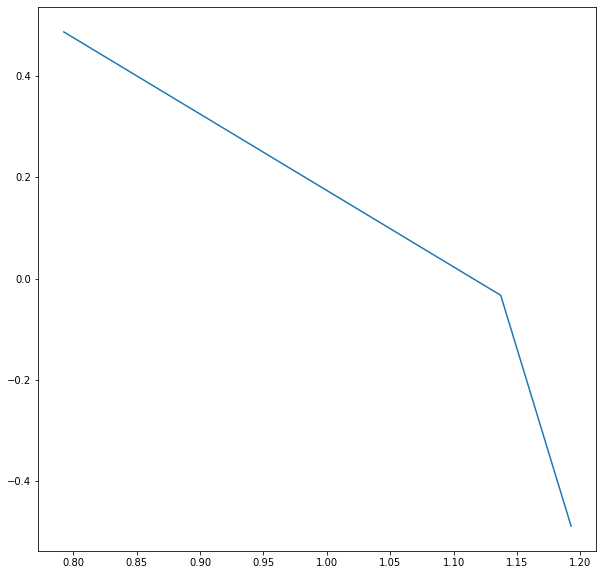

In [21]:
plt.figure(figsize=(10,10))
x,p,track = hmc.leapfrog.leap()
# ax = sns.kdeplot(hmc.samples,n_levels=60,cmap="Reds", shade=True, shade_lowest=False)
plt.plot(track[:,0],track[:,1])

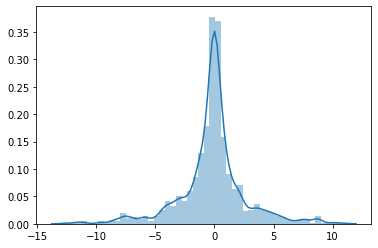

In [22]:
sns.distplot(hmc.samples[:,0])